In [ ]:
# coding=utf-8
# Copyright 2023 Frank Latos AC8P
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Understanding the Format of Data Returned by a Simulation

Running simulations of NEC5 antenna designs involves creating each design as a single python string, then passing a list of any number of designs to one of the nec_sim_* functions:
```python
results = nec_sim_stdio3([design0, design1, ...])
```
which will execute the simulations as separate processes and return a nested list of results, described in detail below.

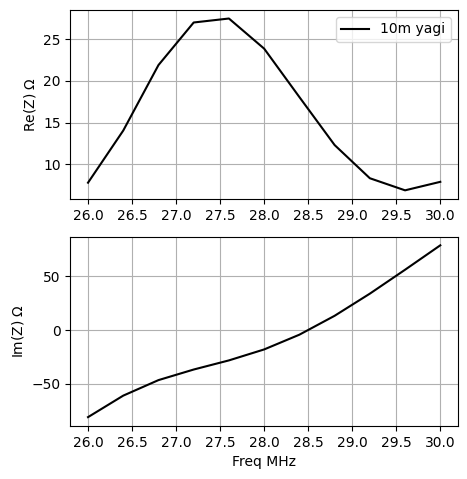

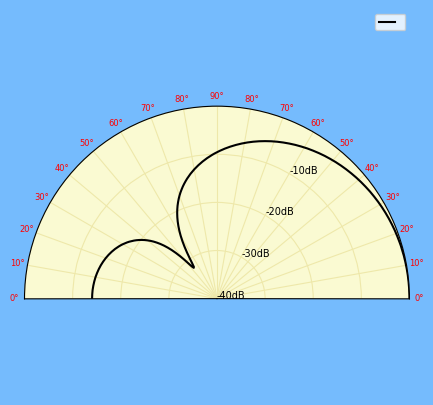

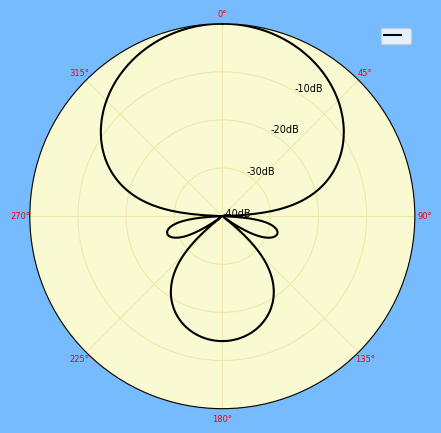

In [2]:
from necutil import nec5_sim_stdio3, plot_complex_z, plot_azimuth2, plot_elevation

yagi = '\n'.join(
    ['CE 3-el Yagi in free space',               
     'GW 1 20 -0.914 -2.796 0 -0.914 2.796 0 .0064',    # R
     'GW 2 20 0 -2.561 0 0 2.561 0 .0064',              # DE
     'GW 3 20 1.37 -2.446 0 1.37 2.446 0 .0064',        # D
     'GE 0 0',                                          # End of geometry; no ground plane specified
     'EX 4 2 10 2 1.0 0.0',                             # Excitation: current source (1A), tag=2, segment=10, far end=2
     'FR 0 11 0 0 28.0 0.1',                            # Frequencies for XQ card: 28.0 - 29.0 MHz
     'XQ 0',                                            # Simulate feedpoint impedance
     'FR 0 11 0 0 26.0 0.4',                            # Frequencies for XQ card: 26.0 - 30.0 MHz
     'XQ 0',                                            # Simulate feedpoint impedance
     'FR 0 1 0 0 28.5 0',                               # Frequency for RP card: 14.1 MHz
     'RP 0 91 361 0000 0 0 1 1',                        # Simulate radiation pattern on 1deg grid
     'EN\n'                                             # End
    ])

result = nec5_sim_stdio3([yagi])


rparr = result[0][1][0][0][1]                           # Rad pattern array returned from simulation
plot_complex_z([result[0][0][1]], ['10m yagi'])              # Feedpoint Z
plot_elevation([rparr], [''])                           # Elevation
plot_azimuth2([rparr], [0], [''])  # Azimuth

The data structure ```result``` returned here is a nested list of data produced by the XQ and RP cards in each design:
```
result[design#] [0 for XQ, 1 for RP] [result set#]
```
The above design has two 'XQ' cards, so there are two result sets:

```
result[0][0][0] =                   # [design# 0][XQ results][first XQ card]
    [[28.0, (23.862-18.013j)],      # List of frequency/complex-z pairs
    [28.1, (22.528-14.956j)],
    [28.2, (21.092-11.658j)],
    ...

result[0][0][1] =                   # [design# 0][XQ results][second XQ card]
    [[26.0, (7.804-80.93j)],        # List of frequency/complex-z pairs
    [26.4, (14.049-60.943j)],
    [26.8, (21.895-46.519j)],
    ...

```

In [6]:
len(result[0][0][0])

11

In [8]:
result[0][0][1]

[[26.0, (7.804-80.93j)],
 [26.4, (14.049-60.943j)],
 [26.8, (21.895-46.519j)],
 [27.2, (26.995-36.684j)],
 [27.6, (27.471-28.197j)],
 [28.0, (23.862-18.013j)],
 [28.4, (18.062-4.3124j)],
 [28.8, (12.316+13.249j)],
 [29.2, (8.3392+33.819j)],
 [29.6, (6.8899+56.049j)],
 [30.0, (7.9082+78.754j)]]